# Loading libraries
Loading the libraries I will need and suppressing the warnings, as per advice from classes.

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from scipy.stats import poisson
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [29]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

df.to_csv('merged_dataset.csv', index=False)


In [30]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1430150,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1430151,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1430152,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1430153,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0
1430154,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-469.0,-319.0,-409.0,-400.0,0.0


In [31]:
df.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

In [32]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430062e+06,1.428936e+06,1.430155e+06,1.430155e+06,1.430155e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704203e+04,5.294435e+05,2.079102e-02,-1.631495e+04,6.860209e+04,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028021e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.404002e+04,3.557882e+05,1.339810e-02,4.346737e+03,1.451967e+05,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.522900e+04,-1.791200e+04,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893610e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,-1.997500e+04,-2.825000e+03,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,-1.603700e+04,-1.277000e+03,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675090e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,-1.272950e+04,-2.820000e+02,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


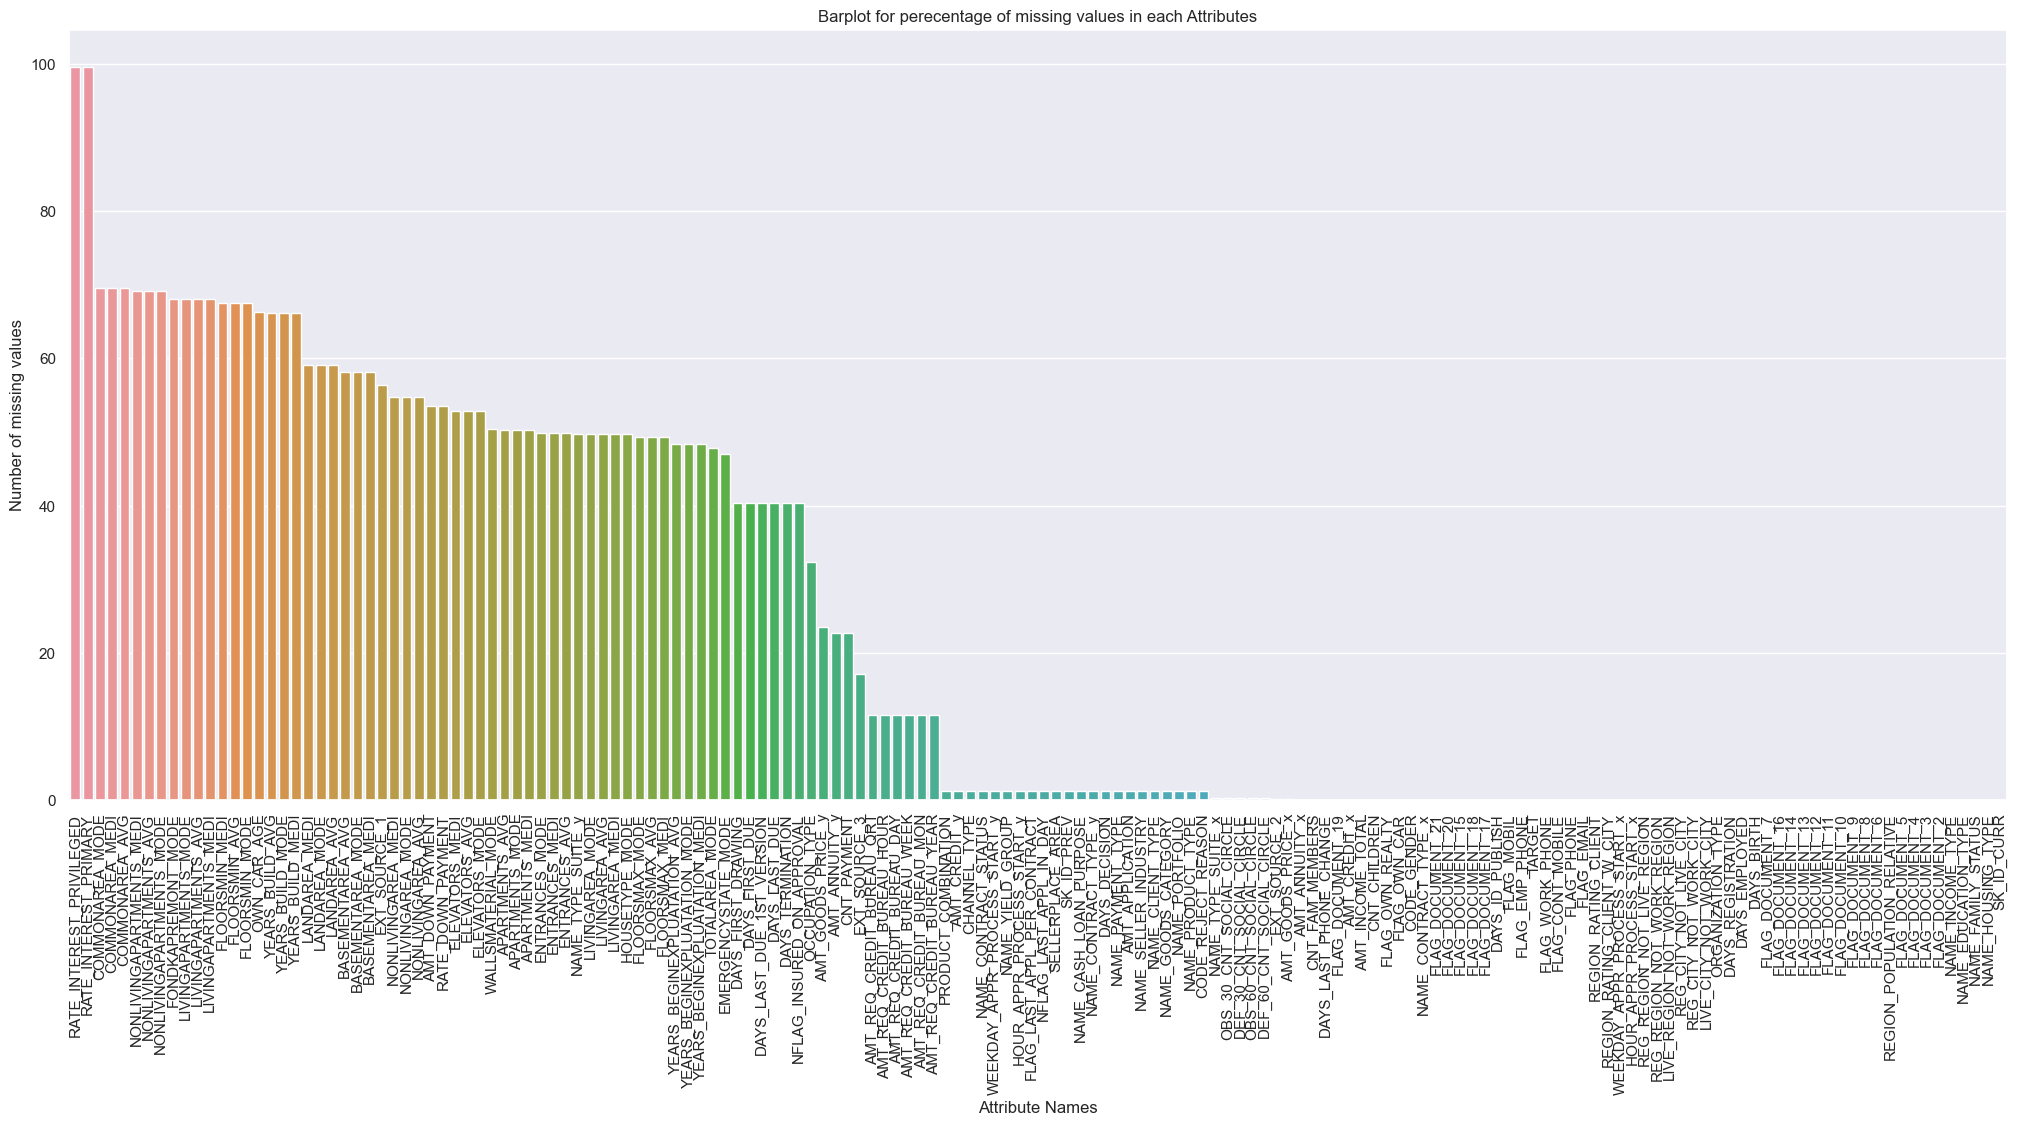

In [33]:
##Barplot on missing values viaulaization column with maximizing missing values
##Missing percentage = Total missing value per attributes/ total nulber of missing values in the dataset

cols_miss_perc = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 10))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each Attributes')
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

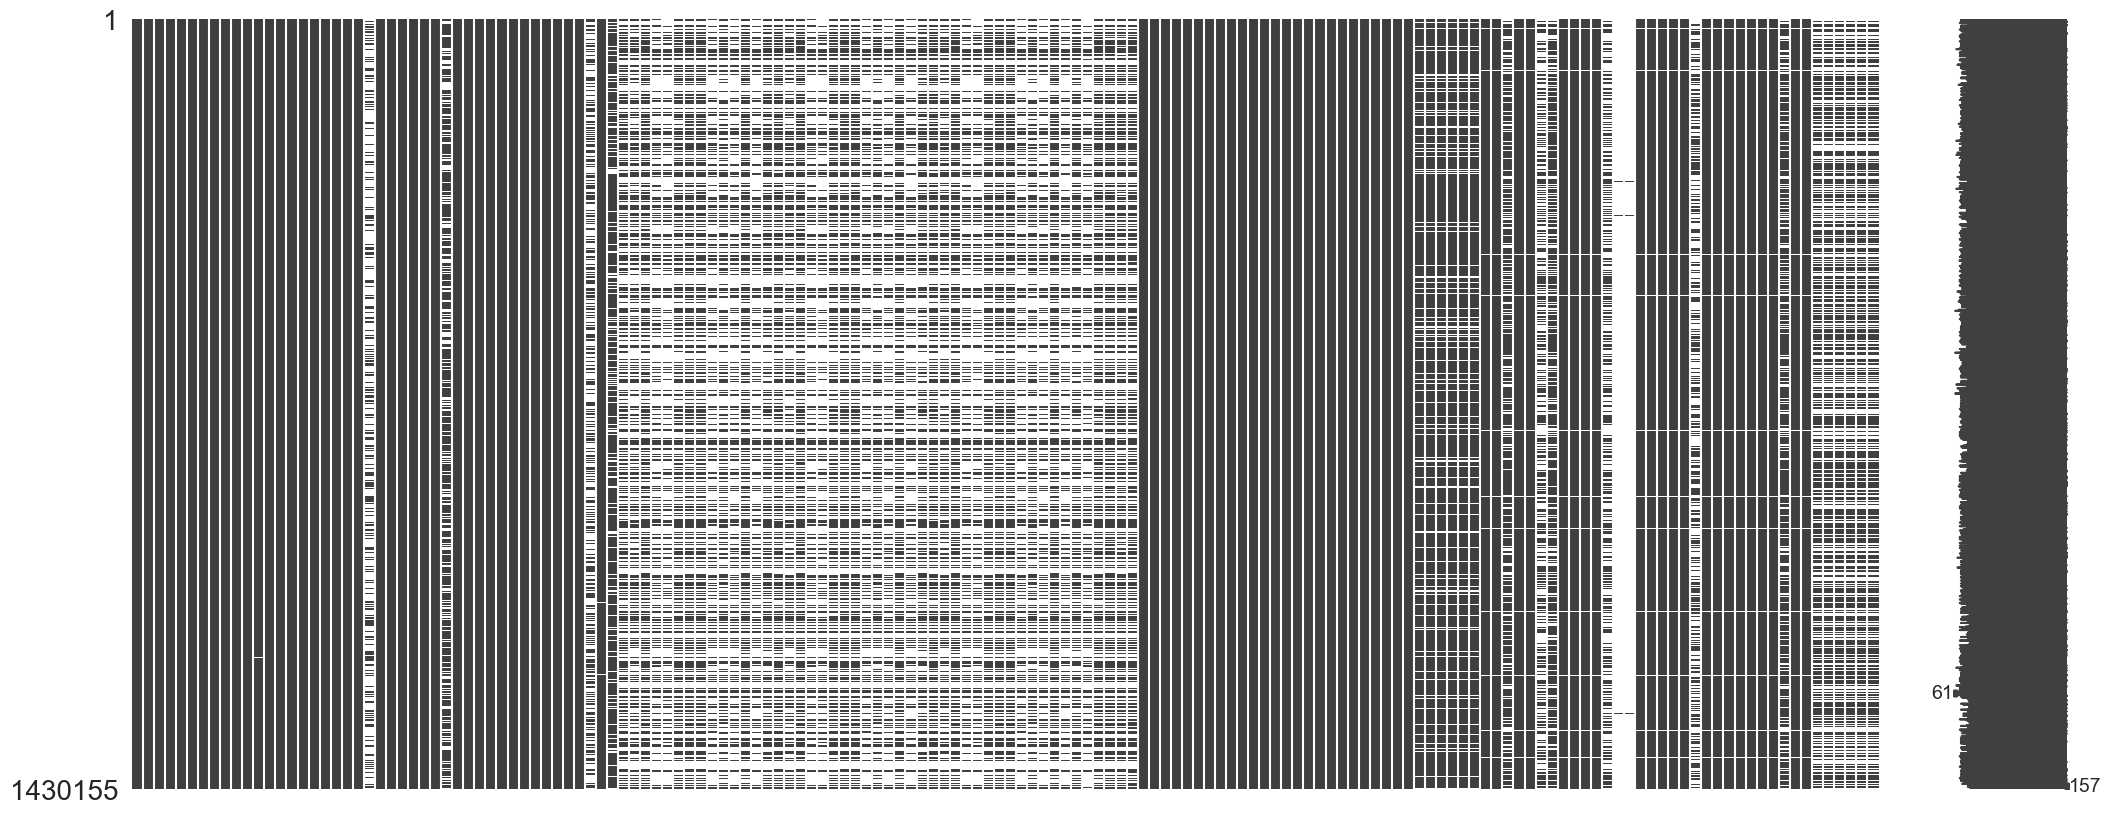

In [34]:
import missingno as msno
ax = msno.matrix(df)

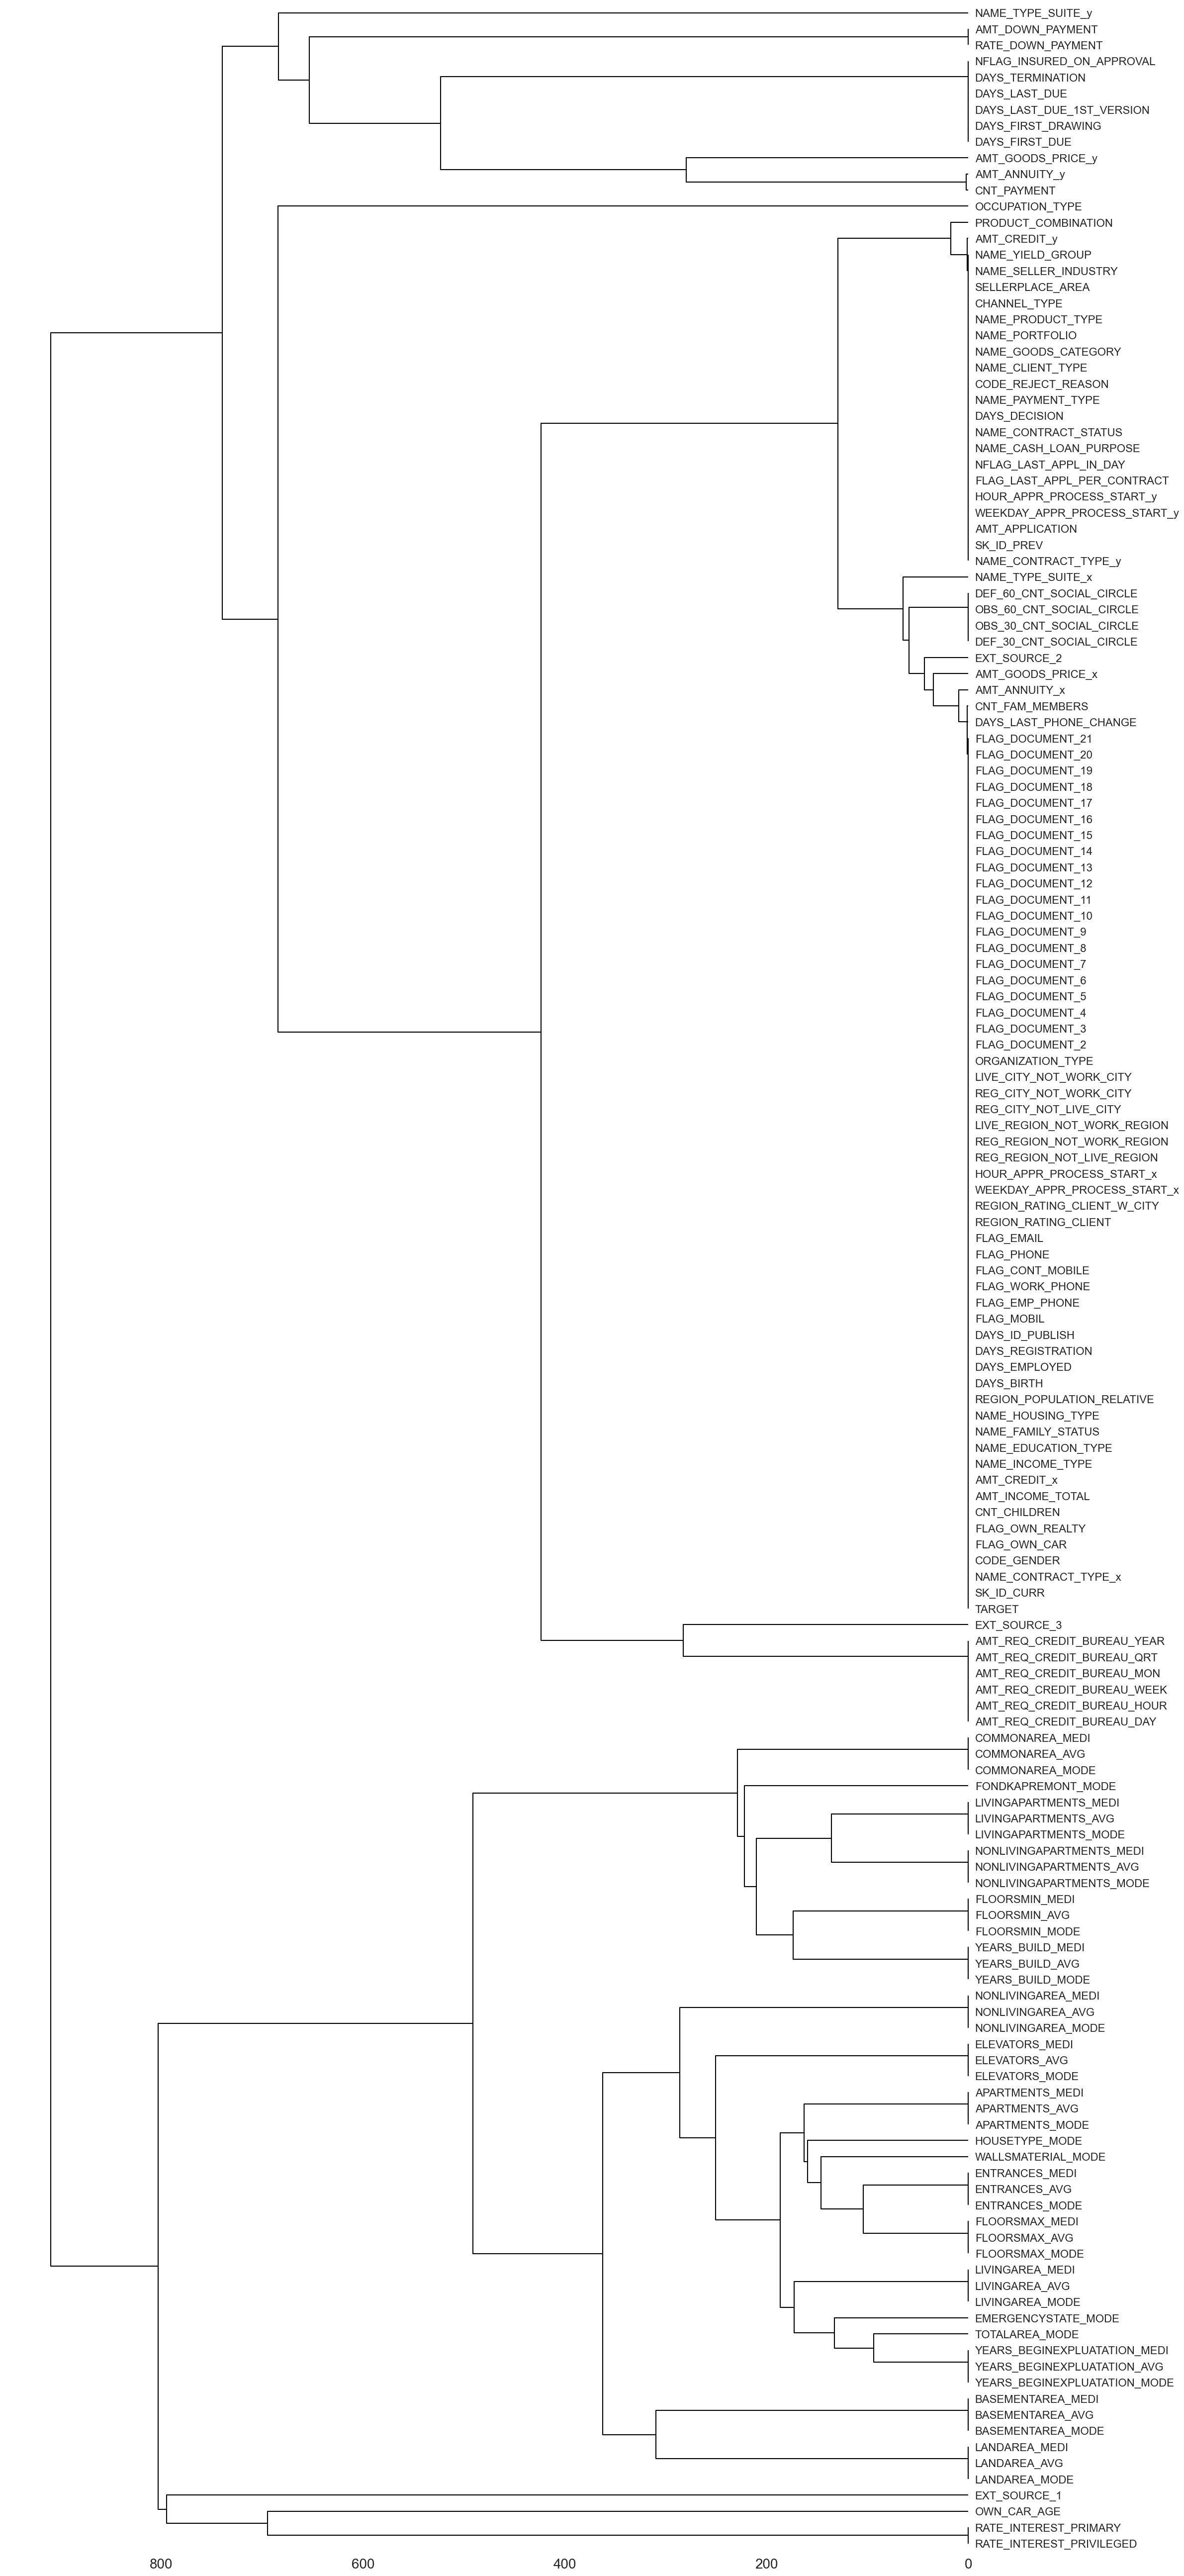

In [35]:
ax = msno.dendrogram(df)

In [36]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


## Removing NaN values.
First, due to high number of columns and rows, I have decided to remove columns that contain more than 20% of NaN values. First line of code was to calculate the percentage of NaN values in each column. Second line of the code was to get the list of columns with more than 20% NaN values and third line of the code was actual dropping those columns with more than 20% of NaN values. There were 64 columns that were falling into this condition and none of those columns was cruical for further work, so I could drop them.

In [37]:
nan_percentage = df.isna().mean() * 100

cols_with_high_nan = nan_percentage[nan_percentage > 20].index.tolist()

df = df.drop(cols_with_high_nan, axis=1)

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle,POS mobile without interest


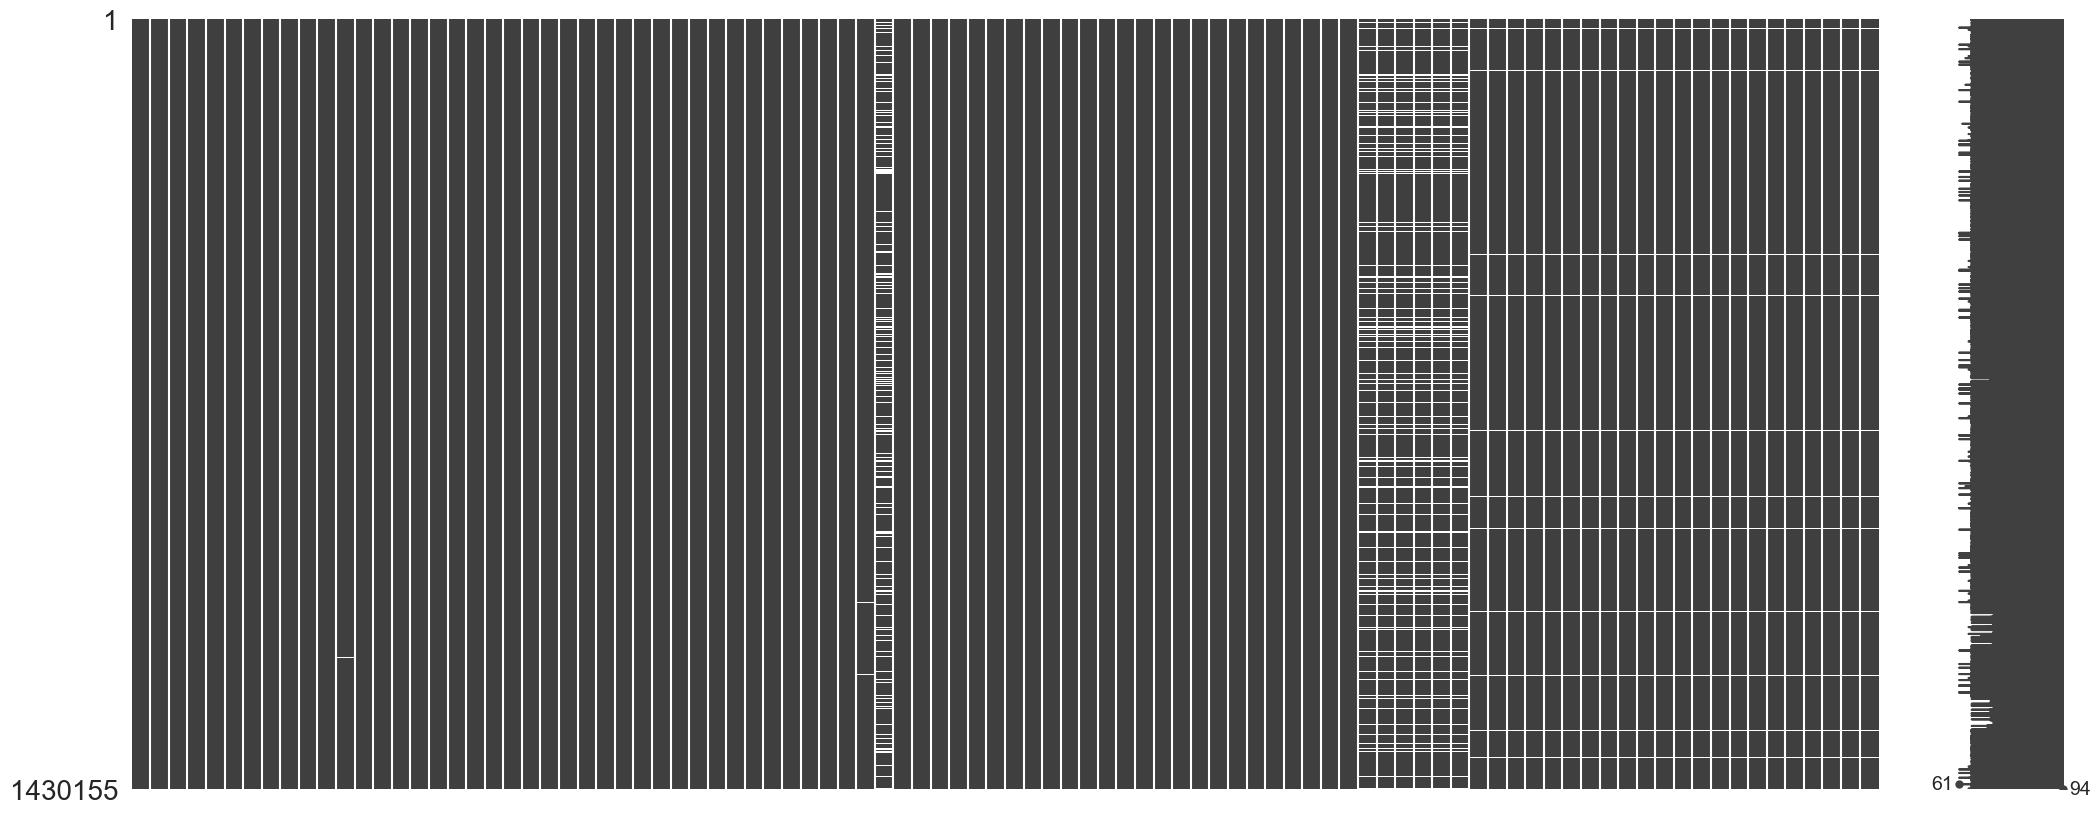

In [38]:
ax = msno.matrix(df)

In [39]:
df.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

## Removing rows with NaN values
After I removed columns with more than 20% NaN values, now it was time to remove rows with NaN values. Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [40]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

1623612

### After that, I dropped rows with NaN values:

In [41]:
df = df.dropna()
df.shape

(1164707, 94)

In [42]:
total_NaN_number = df.isna().sum().sum()

total_NaN_number

0

# Data Preparation

### Since we still have high number of columns (94), I decided to list all the columns and create new dataframe with columns I find relevant for further work.

In [43]:
column_names = df.columns.tolist()

print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DO

# Feature Selections

In [44]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE']]

In [45]:
df.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
4            100004       0      Revolving loans           M            Y   
20           100008       0           Cash loans           M            N   
21           100008       0           Cash loans           M            N   
22           100008       0           Cash loans           M            N   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

### Now we have new dataset with 29 columns and 1164707 rows.

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [46]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

932511

In [47]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')

df.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
4            100004       0      Revolving loans           M            Y   
20           100008       0           Cash loans           M            N   
25           100009       0           Cash loans           F            Y   
32           100010       0           Cash loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430130      456247       0           Cash loans           F            N   
1430139      456249       0           Cash loans           F            N   
1430143      456253       0           Cash loans           F            N   
1430145      456254       1           Cash loans           F            N   
1430147      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

### Our finalised dataset consist of 232196 rows in 29 columns.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232196 entries, 0 to 1430147
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  232196 non-null  int64  
 1   TARGET                      232196 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        232196 non-null  object 
 3   CODE_GENDER                 232196 non-null  object 
 4   FLAG_OWN_CAR                232196 non-null  object 
 5   FLAG_OWN_REALTY             232196 non-null  object 
 6   CNT_CHILDREN                232196 non-null  int64  
 7   AMT_INCOME_TOTAL            232196 non-null  float64
 8   AMT_CREDIT_x                232196 non-null  float64
 9   AMT_ANNUITY_x               232196 non-null  float64
 10  NAME_INCOME_TYPE            232196 non-null  object 
 11  NAME_EDUCATION_TYPE         232196 non-null  object 
 12  NAME_FAMILY_STATUS          232196 non-null  object 
 13  NAME_HOUSING_

## Replacing categorical variables with numerical values

In [49]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,1038818.0,Consumer loans,179055.0,179055.0,XAP,Approved,-606.0,XNA,XAP,New
4,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,1564014.0,Consumer loans,24282.0,20106.0,XAP,Approved,-815.0,Cash through the bank,XAP,New
20,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,...,2218188.0,Consumer loans,162598.5,162598.5,XAP,Approved,-370.0,Cash through the bank,XAP,Repeater
25,100009,0,Cash loans,F,1,1,1,171000.0,1560726.0,41301.0,...,1413109.0,Consumer loans,98239.5,98239.5,XAP,Approved,-449.0,Cash through the bank,XAP,Repeater
32,100010,0,Cash loans,M,1,1,0,360000.0,1530000.0,42075.0,...,2349489.0,Consumer loans,247212.0,260811.0,XAP,Approved,-1070.0,Cash through the bank,XAP,New


In [50]:
df1=df

### Getting number and names of the object columns

In [51]:
obj_cols = df.select_dtypes(include='object')

num_obj_cols = obj_cols.shape[1]

num_obj_cols

12

In [52]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE']

### Getting all unique values for each object column 

In [53]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [54]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [55]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [56]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [57]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [58]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [59]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Medicine', 'Furniture',
       'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Buying a home', 'Payments on other loans', 'Business development',
       'Buying a new car', 'Journey', 'Gasification / water supply',
       'Buying a garage', 'Hobby', 'Money for a third person',
       'Refusal to name the goal'], dtype=object)

In [60]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [61]:
unique_values = df["NAME_PAYMENT_TYPE"].unique()
unique_values

array(['XNA', 'Cash through the bank', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [62]:
unique_values = df["CODE_REJECT_REASON"].unique()
unique_values

array(['XAP', 'LIMIT', 'HC', 'SCO', 'VERIF', 'CLIENT', 'SCOFR', 'XNA',
       'SYSTEM'], dtype=object)

In [63]:
unique_values = df["NAME_CLIENT_TYPE"].unique()
unique_values

array(['New', 'Repeater', 'Refreshed', 'XNA'], dtype=object)

### Replacing all categorical variables with numeric values

In [64]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 2, 'Unused offer': 4,
                'Cash through the bank': 0, 'Non-cash from your account': 1, 'Cashless from the account of the employer': 2,
                'LIMIT': 1, 'HC': 2, 'SCO': 4, 'VERIF': 5, 'CLIENT': 6, 'SCOFR': 7, 'SYSTEM': 8,
                'New': 0, 'Repeater': 1, 'Refreshed': 2})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,...,1038818.0,2,179055.0,179055.0,0,1,-606.0,3,0,0
4,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,...,1564014.0,2,24282.0,20106.0,0,1,-815.0,0,0,0
20,100008,0,0,0,0,1,0,99000.0,490495.5,27517.5,...,2218188.0,2,162598.5,162598.5,0,1,-370.0,0,0,1
25,100009,0,0,1,1,1,1,171000.0,1560726.0,41301.0,...,1413109.0,2,98239.5,98239.5,0,1,-449.0,0,0,1
32,100010,0,0,0,1,1,0,360000.0,1530000.0,42075.0,...,2349489.0,2,247212.0,260811.0,0,1,-1070.0,0,0,0


### Our dataset is now completely filled with numerical values only

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232196 entries, 0 to 1430147
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  232196 non-null  int64  
 1   TARGET                      232196 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        232196 non-null  int64  
 3   CODE_GENDER                 232196 non-null  int64  
 4   FLAG_OWN_CAR                232196 non-null  int64  
 5   FLAG_OWN_REALTY             232196 non-null  int64  
 6   CNT_CHILDREN                232196 non-null  int64  
 7   AMT_INCOME_TOTAL            232196 non-null  float64
 8   AMT_CREDIT_x                232196 non-null  float64
 9   AMT_ANNUITY_x               232196 non-null  float64
 10  NAME_INCOME_TYPE            232196 non-null  int64  
 11  NAME_EDUCATION_TYPE         232196 non-null  int64  
 12  NAME_FAMILY_STATUS          232196 non-null  int64  
 13  NAME_HOUSING_

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Refused': 0, 'Approved': 1, 'Canceled': 2, XNA: 3, 'Unused offer': 4
#### NAME_PAYMENT_TYPE
'Cash through the bank': 0, 'Non-cash from your account': 1, 'Cashless from the account of the employer': 2
#### CODE_REJECT_REASON
XAP: 0,'LIMIT': 1, 'HC': 2, XNA: 3, 'SCO': 4, 'VERIF': 5, 'CLIENT': 6, 'SCOFR': 7, 'SYSTEM': 8
#### NAME_CLIENT_TYPE
'New': 0, 'Repeater': 1, 'Refreshed': 2, XNA: 3

In [66]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,...,1038818.0,2,179055.0,179055.0,0,1,-606.0,3,0,0
4,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,...,1564014.0,2,24282.0,20106.0,0,1,-815.0,0,0,0
20,100008,0,0,0,0,1,0,99000.0,490495.5,27517.5,...,2218188.0,2,162598.5,162598.5,0,1,-370.0,0,0,1
25,100009,0,0,1,1,1,1,171000.0,1560726.0,41301.0,...,1413109.0,2,98239.5,98239.5,0,1,-449.0,0,0,1
32,100010,0,0,0,1,1,0,360000.0,1530000.0,42075.0,...,2349489.0,2,247212.0,260811.0,0,1,-1070.0,0,0,0


#### Aprroach 2 - Encoding the categorical variable using one hot encoder and label encoderand it for PCA and feature analysis.

In [67]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE
0,100002,1,0,0,0,1,0,202500.0,406597.5,24700.5,...,1038818.0,2,179055.0,179055.0,0,1,-606.0,3,0,0
4,100004,0,1,0,1,1,0,67500.0,135000.0,6750.0,...,1564014.0,2,24282.0,20106.0,0,1,-815.0,0,0,0
20,100008,0,0,0,0,1,0,99000.0,490495.5,27517.5,...,2218188.0,2,162598.5,162598.5,0,1,-370.0,0,0,1
25,100009,0,0,1,1,1,1,171000.0,1560726.0,41301.0,...,1413109.0,2,98239.5,98239.5,0,1,-449.0,0,0,1
32,100010,0,0,0,1,1,0,360000.0,1530000.0,42075.0,...,2349489.0,2,247212.0,260811.0,0,1,-1070.0,0,0,0


# PCA
Before starting with PCA, I will scale the data.

In [100]:
#Divide the dataset in X and y according to the dependent variable "TARGET".
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [101]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((232196, 28), (232196,), (174147, 28), (58049, 28), (174147,), (58049,))

In [102]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[-0.30029287 -0.31004175  0.7039117  ... -0.6685924  -0.32143301
   1.96993796]
 [ 1.71610564 -0.31004175 -1.41974976 ... -0.6685924  -0.32143301
   0.37166926]
 [ 0.07662231 -0.31004175  0.7039117  ...  1.5066885  -0.32143301
   0.37166926]
 ...
 [ 0.23833926 -0.31004175  0.7039117  ... -0.6685924  -0.32143301
  -1.22659943]
 [ 0.46363507 -0.31004175 -1.41974976 ... -0.6685924  -0.32143301
  -1.22659943]
 [ 0.08907179 -0.31004175  0.7039117  ... -0.6685924   1.39138468
   0.37166926]] 	 [[ 1.42558853 -0.31004175  0.7039117  ... -0.6685924  -0.32143301
  -1.22659943]
 [-0.01397417 -0.31004175  0.7039117  ...  1.5066885   1.39138468
   0.37166926]
 [-1.30235485 -0.31004175  0.7039117  ...  1.5066885  -0.32143301
   0.37166926]
 ...
 [-0.99425684 -0.31004175  0.7039117  ... -0.6685924  -0.32143301
   0.37166926]
 [ 1.71405503 -0.31004175 -1.41974976 ... -0.6685924  -0.32143301
   1.96993796]
 [-1.24325624 -0.31004175 -1.41974976 ... -0.6685924  -0.32143301
  -1.22659943]] 	 [[-1.7296413

In [103]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 20)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (232196, 28)
Reduced shape: (232196, 20)


In [104]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.21559688 0.0881063  0.07400591 0.05905591 0.05143261 0.03635678
 0.03505741 0.03192784 0.03041079 0.02958026 0.02915809 0.02899177
 0.02881319 0.02836654 0.02650562 0.02575498 0.02365358 0.0233193
 0.02298059 0.02190635]


In [105]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'cumulative explained variance')

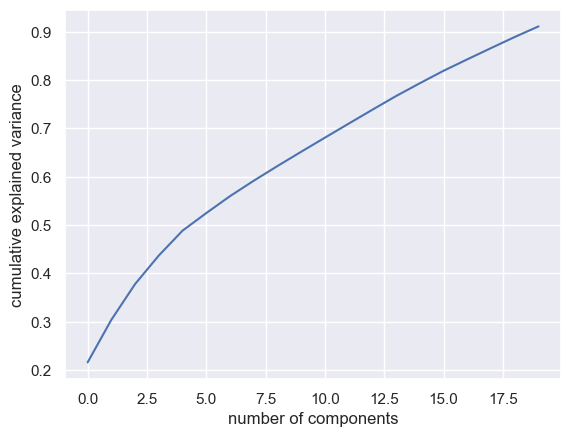

In [106]:
#apply PCA to determinate principle components which hold 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:>

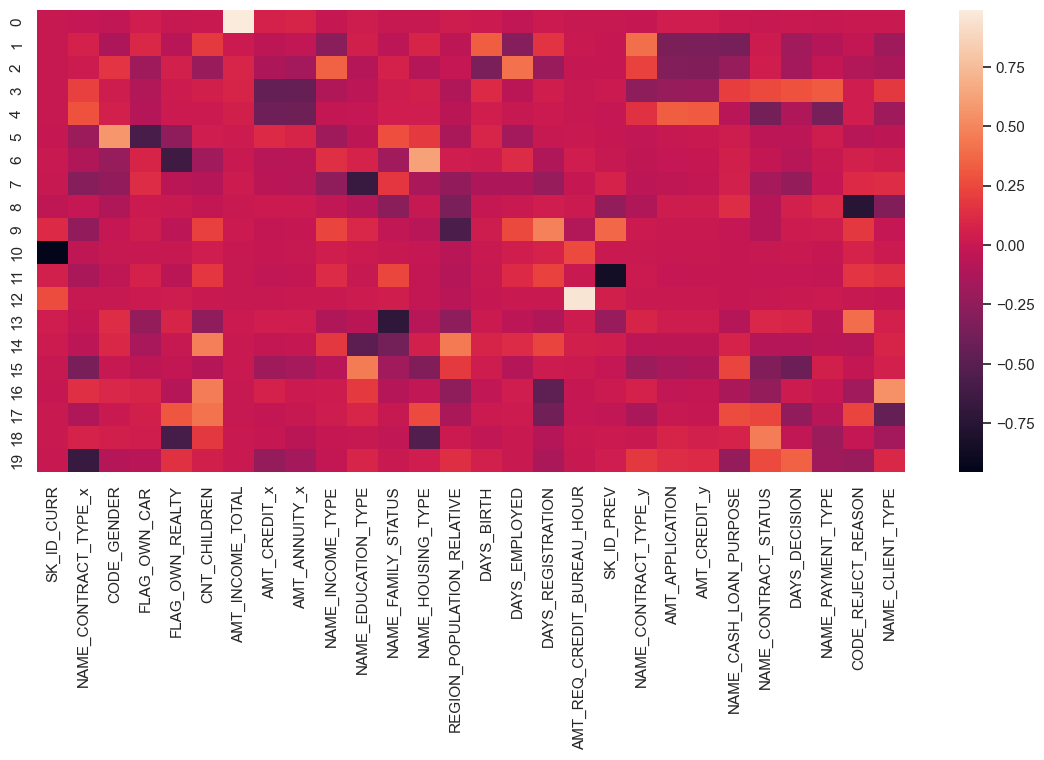

In [107]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# Model Building-

#Objective 1- fitting  Classification model to predict the target value.

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[53454,     0],
       [ 4595,     0]])

In [109]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9208427363089804 0.0


In [110]:
# SMOTE - applying SMOTE to balance the datapoint since target variable has more 'No' datapoints than 'Yes'
from imblearn.over_sampling import SMOTE 

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [111]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[30003, 23451],
       [ 2018,  2577]])

In [112]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.561249978466468 0.5608269858541893


In [115]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {
   'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
   'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [116]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

We can get accuracy of 0.7929365643269387 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [117]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020451,0.009197,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,NaN,NaN,NaN,42
1,0.010230,0.000339,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,29
2,4.714190,0.208509,0.010108,0.001818,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.745671,0.810740,0.808880,0.788430,0.030245,7
3,7.095683,0.284534,0.008160,0.000357,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.724160,0.806842,0.780281,0.770427,0.034466,12
4,1.035752,0.020889,0.009371,0.000849,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.564657,0.566041,0.567144,0.565947,0.001017,23
5,1.356051,0.198719,0.008382,0.000763,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.565620,0.568238,0.567266,0.567041,0.001080,21
6,0.010522,0.000121,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,NaN,NaN,NaN,32
7,0.012602,0.002844,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,41
8,5.356073,0.395110,0.007911,0.000526,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.750692,0.815284,0.812601,0.792859,0.029837,2
9,6.815181,0.235231,0.007681,0.000190,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.733508,0.809104,0.778598,0.773737,0.031053,8


In [119]:
# LogisticRegression best fit and check the test and train accuracy 
logreg = LogisticRegression(C= 0.1, penalty='l1', solver= 'liblinear')
logreg.fit(X_train, y_train)

# Predict the values
y_pred1 = lr.predict(X_test)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred1)

array([[30003, 23451],
       [ 2018,  2577]])

In [120]:
accuracy = accuracy_score(y_test, y_pred1)

recall = recall_score(y_test, y_pred1)

print(accuracy, recall)

0.561249978466468 0.5608269858541893
